In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os

In [2]:
iris_data = pd.read_csv("Iris.csv",index_col='Id')

In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
## Label encoding since the algorithms we are going to use do not take non numerical or boolean data as inputs
iris_data.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

In [7]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


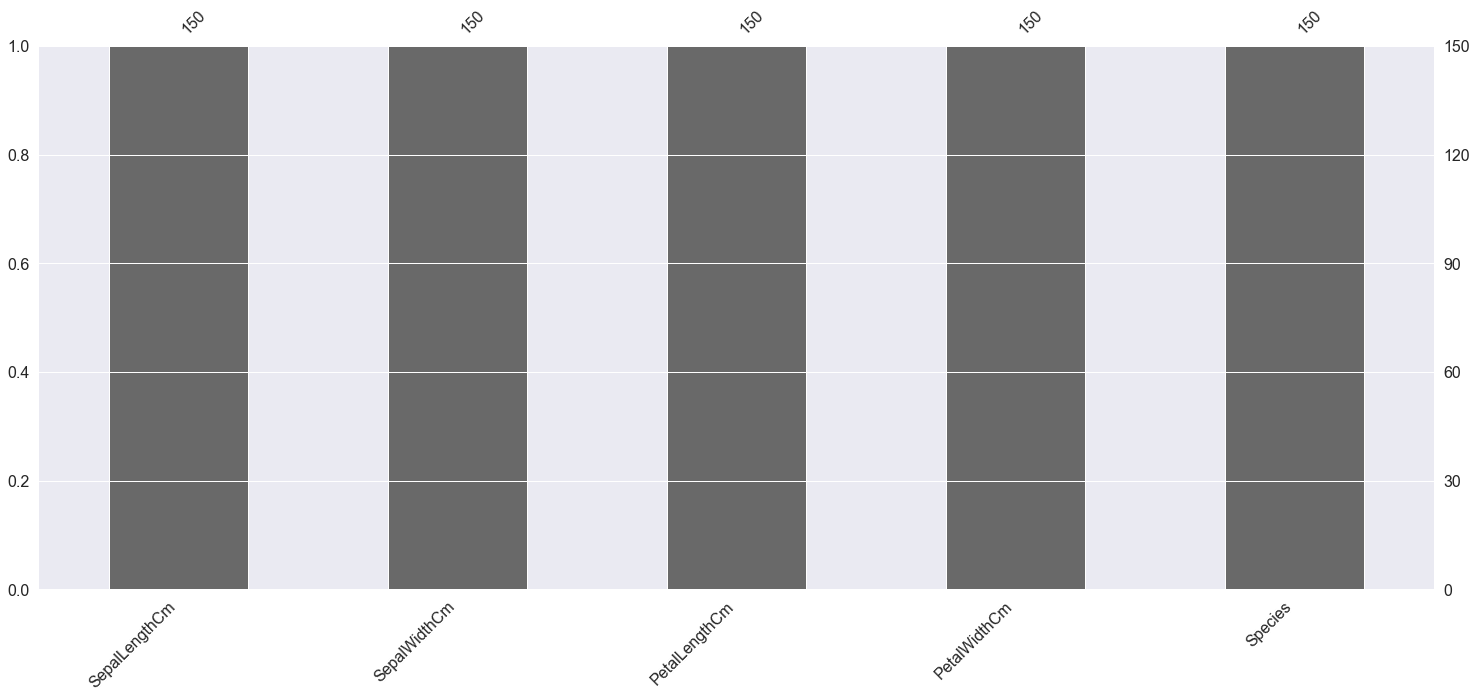

In [8]:
## null count analysis before modelling to keep check
import missingno as msno
p=msno.bar(iris_data)

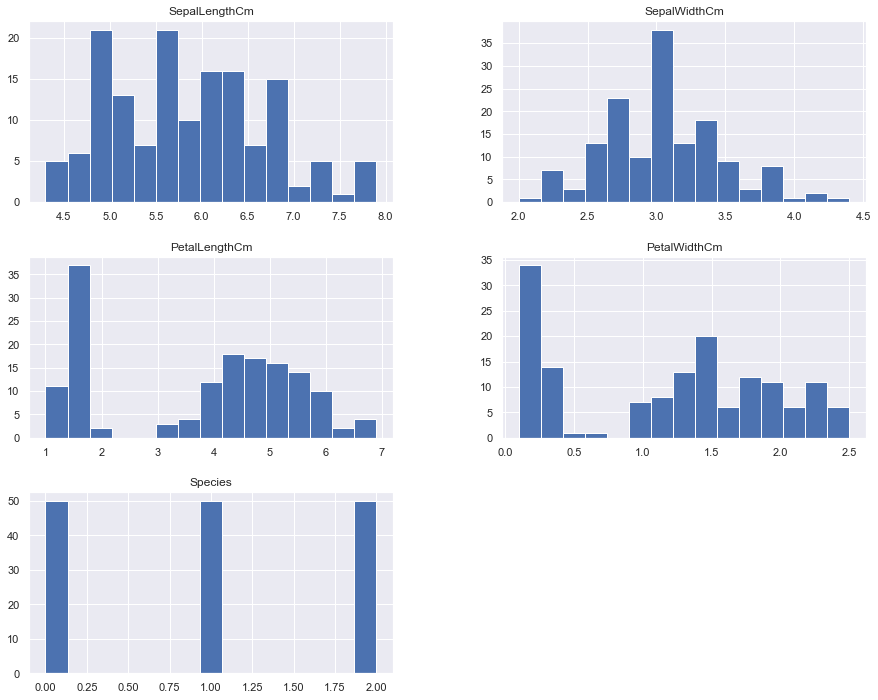

In [9]:
iris_data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

# Modelling

# 1.) Without PCA

In [10]:
X = iris_data.drop(['Species'],axis=1)
y = iris_data.Species

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20, stratify=y)

In [13]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")

Train score before PCA 0.9714285714285714 %
Test score before PCA 0.9777777777777777 %


# 2.) With PCA

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [15]:
pca.get_covariance()

array([[ 0.05290845, -0.00454496,  0.05996621,  0.05982683],
       [-0.00454496,  0.03263959, -0.02271983, -0.02048285],
       [ 0.05996621, -0.02271983,  0.08943348,  0.09155279],
       [ 0.05982683, -0.02048285,  0.09155279,  0.1011136 ]])

In [16]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.84141901, 0.11732474, 0.03490564, 0.00635061])

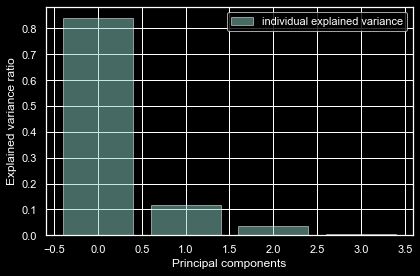

In [17]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [18]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [19]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [20]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.9619047619047619 %
Test score after PCA 0.9777777777777777 %


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


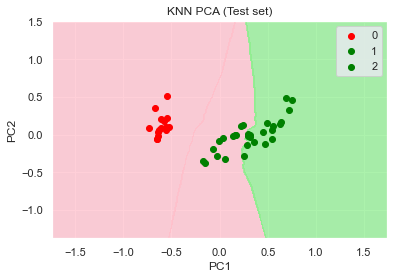

In [21]:
# Visualising the Test set results
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Normalize

In [22]:
import pandas as pd
import numpy as mp
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import  layers
from tensorflow.keras import Sequential
from scipy import stats
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

C:\Users\K sai tharun\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\K sai tharun\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

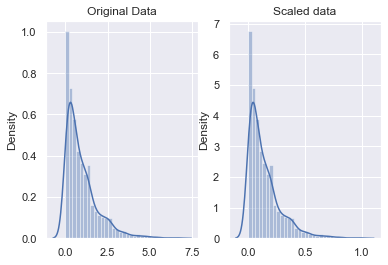

In [23]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

C:\Users\K sai tharun\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\K sai tharun\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

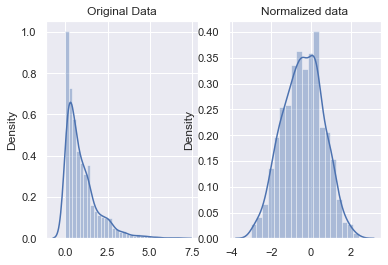

In [24]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

In [25]:
X = iris_data.drop(['Species'],axis=1)
y = iris_data.Species

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [28]:
model = Sequential()

In [29]:
model.add(layers.Dense(600,activation='sigmoid'))
model.add(layers.Dense(300,activation='sigmoid'))
model.add(layers.Dense(1,activation='sigmoid'))

In [30]:
#model.compile(optimizer='adam',metrics=[tf.keras.metrics.mse,tf.keras.metrics.Precision(),tf.keras.metrics.Recall()],loss='binary_crossentropy')
#model.compile(optimizer='adam',loss='binary_crossentropy',metrics=[tf.keras.metrics.Accuracy()])
data = model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [31]:
data = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))


Epoch 1/100
4/4 [==============================] - 1s 49ms/step - loss: 0.4340 - accuracy: 0.3000 - val_loss: 1.1336 - val_accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: -0.3644 - accuracy: 0.3333 - val_loss: 1.7594 - val_accuracy: 0.3333
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: -0.5123 - accuracy: 0.3333 - val_loss: 2.1493 - val_accuracy: 0.3333
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: -0.6798 - accuracy: 0.3333 - val_loss: 2.3262 - val_accuracy: 0.3333
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: -0.6891 - accuracy: 0.3333 - val_loss: 2.5244 - val_accuracy: 0.3333
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: -0.7445 - accuracy: 0.3333 - val_loss: 2.6649 - val_accuracy: 0.3333
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: -0.7818 - accuracy: 0.3333 - val_loss: 2.7800 - val_accuracy: 0.3333
Epoch 8/100
4/4 [===

In [32]:
y_pred = model.predict(X_test)


In [33]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s%.2f%%" % ("accuracy:",scores[1]*100))

accuracy:76.67%


In [34]:
data = model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
data = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
4/4 [==============================] - 0s 42ms/step - loss: -27.6164 - accuracy: 0.6333 - val_loss: -15.3346 - val_accuracy: 0.7667
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: -28.4495 - accuracy: 0.6333 - val_loss: -15.7719 - val_accuracy: 0.7667
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: -29.2549 - accuracy: 0.6333 - val_loss: -16.1973 - val_accuracy: 0.7667
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: -30.0569 - accuracy: 0.6333 - val_loss: -16.6248 - val_accuracy: 0.7667
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: -30.8557 - accuracy: 0.6333 - val_loss: -17.0523 - val_accuracy: 0.7667
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: -31.6528 - accuracy: 0.6333 - val_loss: -17.4862 - val_accuracy: 0.7667
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: -32.4525 - accuracy: 0.6250 - val_loss: -17.9239 - val_accuracy: 0.766